### Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [2]:
calendar = pd.read_csv('./data/calendar.csv')
prices = pd.read_csv('./data/sell_prices.csv')

sample = pd.read_csv('./data/sample_submission.csv')

In [3]:
display(calendar.head())
display(prices.head())

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


### EDA

In [11]:
calendar.describe()

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


In [12]:
prices.describe()

,wm_yr_wk,sell_price
count,6.841121e+06,6.841121e+06
mean,1.138294e+04,4.410952e+00
std,1.486100e+02,3.408814e+00
min,1.110100e+04,1.000000e-02
25%,1.124700e+04,2.180000e+00
50%,1.141100e+04,3.470000e+00
75%,1.151700e+04,5.840000e+00
max,1.162100e+04,1.073200e+02


Text(0, 0.5, 'Number of Sales')

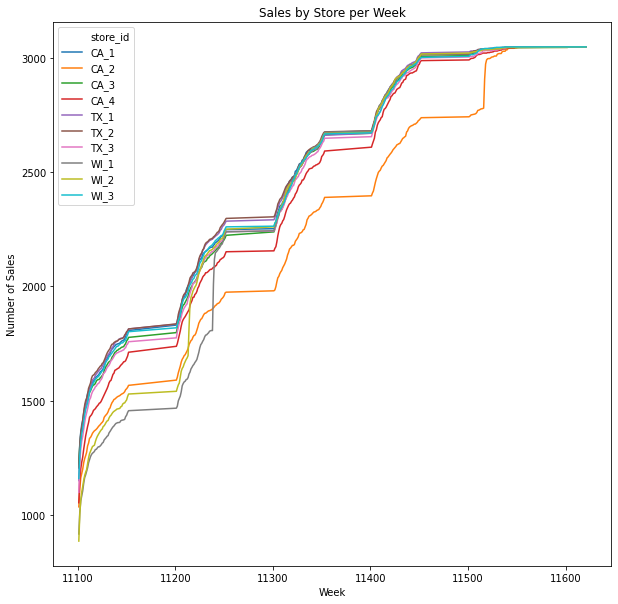

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

tmp = prices.copy()
tmp = tmp.groupby(['wm_yr_wk', 'store_id'])['sell_price'].count()

_ = sns.lineplot(x='wm_yr_wk', y='sell_price', data=tmp.reset_index(), hue='store_id', ax=ax)
plt.title('Sales by Store per Week')
plt.xlabel('Week')
plt.ylabel('Number of Sales')

Text(0, 0.5, 'Number of Sales')

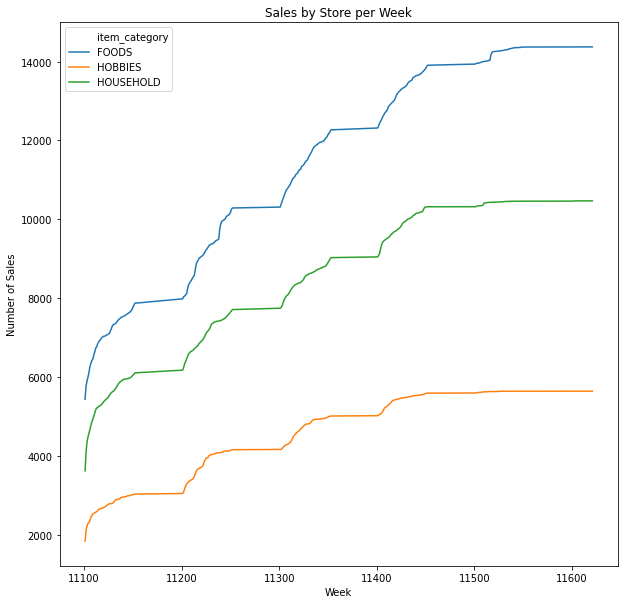

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))

tmp = prices.copy()
tmp['item_category'] = tmp.item_id.map(lambda x: x.split('_')[0])
tmp = tmp.groupby(['wm_yr_wk', 'item_category'])['sell_price'].count()

_ = sns.lineplot(x='wm_yr_wk', y='sell_price', data=tmp.reset_index(), hue='item_category', ax=ax)
plt.title('Sales by Store per Week')
plt.xlabel('Week')
plt.ylabel('Number of Sales')

In [19]:
def price_dist_by_store_gen(stores, df):
    for store in stores:
        fig, ax = plt.subplots(figsize=(10, 10))
        tmp = df.copy()
        tmp = tmp.loc[tmp.store_id == store, 'sell_price']
        stats = tmp.describe()
        tmp = tmp.values
        _ = sns.distplot(tmp, ax=ax)
        plt.title(f'Distribution of prices in {store}')
        yield stats

In [28]:
stores = prices.store_id.unique().tolist()

In [31]:
x = price_dist_by_store_gen(stores, prices)

count    698412.000000
mean          4.414233
std           3.400663
min           0.010000
25%           2.220000
50%           3.470000
75%           5.770000
max          30.980000
Name: sell_price, dtype: float64

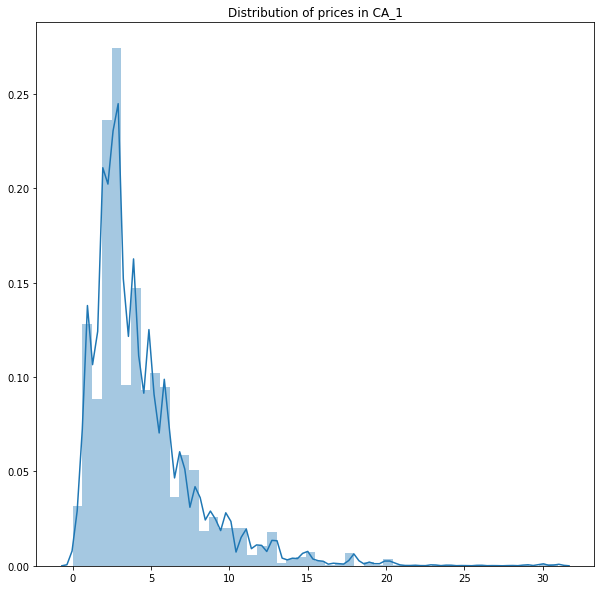

In [33]:
next(x)

count    691112.000000
mean          4.387365
std           3.391055
min           0.020000
25%           2.080000
50%           3.440000
75%           5.840000
max          30.980000
Name: sell_price, dtype: float64

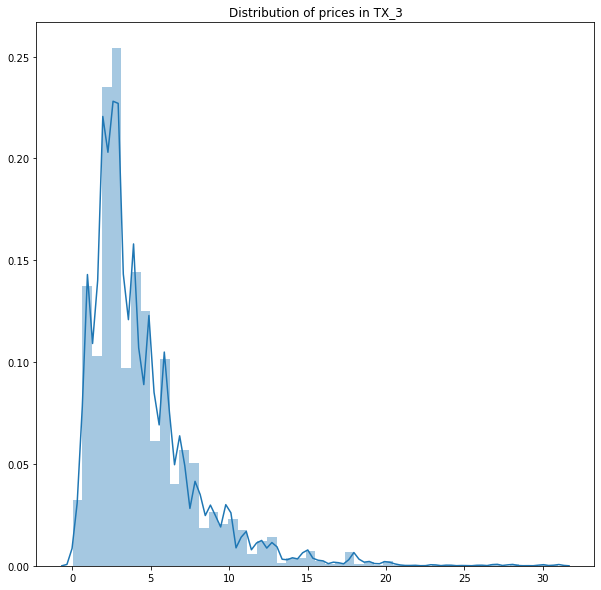

In [39]:
next(x)